## Load Norther data

In [1]:
import pickle

full_path = r"C:\Users\fdenolas\OneDrive - Vrije Universiteit Brussel\Uni\[07]Datasets\NRT_dataframes\DEL_Mtn_NRT_112022_102024.pkl"

with open(full_path, 'rb') as f:
    full_list = pickle.load(f)

In [2]:
from dw_database.utils import DynawindFrame, SiteFrame
from dw_config.location import Turbine

sf = SiteFrame([
    DynawindFrame(
        df=df,
        location=Turbine("NRT" + df.columns[7].split('_')[2]),
        short_key='NRT'
    )
    for df in full_list
])

In [3]:
sf = SiteFrame(df.classify() or df for df in sf if df.location.case_definitions)

## Load timestamps

In [4]:
import pandas as pd

df_db = pd.read_csv(r"C:\Users\fdenolas\OneDrive - Vrije Universiteit Brussel\Uni\[07]Datasets\AE_project\df_db.csv")

In [5]:
df_db

,Unnamed: 0,timestamp,turbine_name,RMS_X,RMS_Y,RMS_Z
0,0,2023-01-05 21:00:00+00:00,NRTA01,0.010291,0.009528,0.001751
1,1,2023-01-05 21:10:00+00:00,NRTA01,0.011594,0.011038,0.001934
2,2,2023-01-05 21:20:00+00:00,NRTA01,0.010623,0.012989,0.002146
3,3,2023-01-05 21:30:00+00:00,NRTA01,0.010507,0.011739,0.001901
4,4,2023-01-05 21:40:00+00:00,NRTA01,0.008098,0.010316,0.001820
...,...,...,...,...,...,...
138685,138685,2023-07-05 23:10:00+00:00,NRTK03,0.005848,0.007684,0.001299
138686,138686,2023-07-05 23:20:00+00:00,NRTK03,0.009183,0.007364,0.001180
138687,138687,2023-07-05 23:30:00+00:00,NRTK03,0.007316,0.007431,0.001202
138688,138688,2023-07-05 23:40:00+00:00,NRTK03,0.006303,0.008378,0.001322


### Delay check

In [6]:
from datetime import timedelta
# Ensure sf[0].index and df_db.iloc[:6].timestamp are of the same type
sf[0].index = pd.to_datetime(sf[0].index)
timestamps = pd.to_datetime(df_db.iloc[:6].timestamp)

# Filter rows where sf[0].index is in the timestamp Series


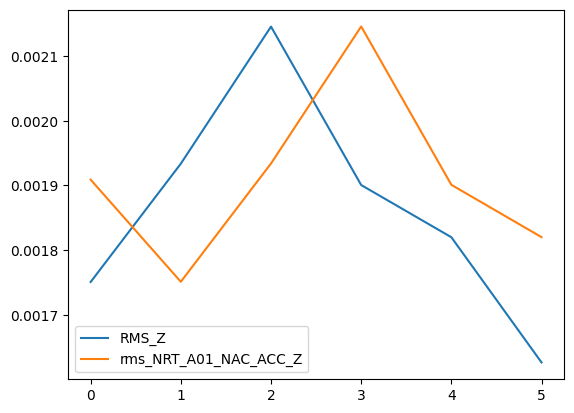

In [7]:
import matplotlib.pyplot as plt
plt.plot(df_db.iloc[:6].RMS_Z,label='RMS_Z')
plt.plot(sf[0][sf[0].index.isin(timestamps)]['rms_Z'].values,label='rms_NRT_A01_NAC_ACC_Z')
plt.legend()
plt.show()

In [8]:
sf[0]['rms_FA']

timestamp
2022-11-01 00:00:00+00:00    0.009678
2022-11-01 00:10:00+00:00    0.013391
2022-11-01 00:20:00+00:00    0.009493
2022-11-01 00:30:00+00:00    0.008631
2022-11-01 00:40:00+00:00    0.009652
                               ...   
2024-10-31 23:10:00+00:00    0.005486
2024-10-31 23:20:00+00:00    0.005413
2024-10-31 23:30:00+00:00    0.005596
2024-10-31 23:40:00+00:00    0.006113
2024-10-31 23:50:00+00:00    0.005426
Name: rms_NRT_A01_NAC_ACC_FA, Length: 105120, dtype: float64

In [9]:
df_db.iloc[0:2]

,Unnamed: 0,timestamp,turbine_name,RMS_X,RMS_Y,RMS_Z
0,0,2023-01-05 21:00:00+00:00,NRTA01,0.010291,0.009528,0.001751
1,1,2023-01-05 21:10:00+00:00,NRTA01,0.011594,0.011038,0.001934


In [10]:
sf[0][sf[0].index == df_db.iloc[1].timestamp]['rms_FA']

timestamp
2023-01-05 21:10:00+00:00    0.009528
Name: rms_NRT_A01_NAC_ACC_FA, dtype: float64

In [11]:
df_db.turbine_name == 'NRTA01'

0          True
1          True
2          True
3          True
4          True
          ...  
138685    False
138686    False
138687    False
138688    False
138689    False
Name: turbine_name, Length: 138690, dtype: bool

In [26]:
df_db.query(f"turbine_name == 'NRTA01'")

,Unnamed: 0,timestamp,turbine_name,RMS_X,RMS_Y,RMS_Z
0,0,2023-01-05 21:00:00+00:00,NRTA01,0.010291,0.009528,0.001751
1,1,2023-01-05 21:10:00+00:00,NRTA01,0.011594,0.011038,0.001934
2,2,2023-01-05 21:20:00+00:00,NRTA01,0.010623,0.012989,0.002146
3,3,2023-01-05 21:30:00+00:00,NRTA01,0.010507,0.011739,0.001901
4,4,2023-01-05 21:40:00+00:00,NRTA01,0.008098,0.010316,0.001820
...,...,...,...,...,...,...
126637,126637,2023-07-04 07:10:00+00:00,NRTA01,0.008423,0.009884,0.001738
126638,126638,2023-07-04 07:20:00+00:00,NRTA01,0.007147,0.008438,0.001334
126639,126639,2023-07-04 07:30:00+00:00,NRTA01,0.008915,0.008837,0.001518
126640,126640,2023-07-04 07:40:00+00:00,NRTA01,0.007283,0.010982,0.001668


In [12]:
turb='NRTA01'
datetime_list = pd.to_datetime(df_db.query(f"turbine_name == '{turb}'").timestamp).tolist()
datetime_plus_10 = [dt + timedelta(minutes=10) for dt in datetime_list]

In [15]:
df1 = df_db.query(f"turbine_name == '{turb}'").set_index('timestamp')
df1 = df1.loc[~df1.index.duplicated()]  # Remove duplicates from df1
df1.index = pd.to_datetime(df1.index)
filtered_sf = filtered_sf.loc[~filtered_sf.index.duplicated()]  # Remove duplicates from filtered_sf

# Concatenate along axis=1
result = pd.concat([df1, filtered_sf], axis=1)


In [21]:
df_list = []
for df in sf:
    trb = df.location.location_id
    turb = 'NRT'+trb
    tmsp_10 = [dt + timedelta(minutes=10) for dt in pd.to_datetime(df_db.timestamp).to_list()]
    df_scada = df.loc[df.index.isin(tmsp_10)]

    df1 = df_db.query(f"turbine_name == '{turb}'")

    # Concatenate along axis=1
    df_mid = pd.concat([df1, df_scada], axis=0)
    df_list.append(df_mid)

In [16]:
df_list = []
for df in sf:
    trb = df.location.location_id
    turb = 'NRT'+trb
    tmsp_10 = [dt + timedelta(minutes=10) for dt in pd.to_datetime(df_db.timestamp).to_list()]
    df_scada = df.loc[df.index.isin(tmsp_10)]
    df_scada.index = df_scada.index.shift(-10, freq='T') 

    df1 = df_db.query(f"turbine_name == '{turb}'").set_index('timestamp')
    df1 = df1.loc[~df1.index.duplicated()]  # Remove duplicates from df1
    df1.index = pd.to_datetime(df1.index)
    df_scada = df_scada.loc[~df_scada.index.duplicated()]  # Remove duplicates from df_scada

    # Concatenate along axis=1
    df_mid = pd.concat([df1, df_scada], axis=1)
    df_list.append(df_mid)

In [17]:
df_list[5]

,Unnamed: 0,turbine_name,RMS_X,RMS_Y,RMS_Z,mean_NRT_B02_windspeed,min_NRT_B02_windspeed,max_NRT_B02_windspeed,std_NRT_B02_windspeed,mean_NRT_B02_yaw,...,mean_NRT_B02_ti,pred_Mtn_legacy,relative_wind_dir,pred_Mtn_dnn,Mean_muY,CoV,std_NRT_B02_NAC_ACC_FA,std_NRT_B02_NAC_ACC_SS,std_NRT_B02_NAC_ACC_Z,caseID
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-01-05 21:00:00+00:00,17412.0,NRTB02,0.008219,0.008003,0.001566,14.548980,11.2,17.9,1.090818,203.961957,...,7.497554,1.504400e+06,-0.694250,1.428376e+06,0.131287,0.007328,NaN,NaN,NaN,Rated Power: Wind turbine at Max Power Output
2023-01-05 21:10:00+00:00,17413.0,NRTB02,0.011375,0.009641,0.001792,13.323985,11.1,15.6,0.865794,206.068085,...,6.498009,1.817785e+06,-3.207831,1.645662e+06,0.154871,0.005241,NaN,NaN,NaN,Rated Power: Wind turbine at Max Power Output
2023-01-05 21:20:00+00:00,17414.0,NRTB02,0.008601,0.008436,0.001577,16.010227,12.6,18.8,1.154573,217.962222,...,7.211473,1.272179e+06,1.670744,1.289325e+06,0.114054,0.009432,NaN,NaN,NaN,Rated Power: Wind turbine at Max Power Output
2023-01-05 21:30:00+00:00,17415.0,NRTB02,0.008083,0.008008,0.001394,15.869414,13.0,17.8,0.829669,219.950000,...,5.228099,1.020344e+06,1.424826,9.636180e+05,0.094479,0.007302,NaN,NaN,NaN,Rated Power: Wind turbine at Max Power Output
2023-01-05 21:40:00+00:00,17416.0,NRTB02,0.010841,0.008216,0.001470,15.460926,13.1,17.8,0.797619,219.950000,...,5.158932,1.060590e+06,2.251209,9.918917e+05,0.097914,0.007336,NaN,NaN,NaN,Rated Power: Wind turbine at Max Power Output
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-13 23:10:00+00:00,17407.0,NRTB02,0.006766,0.005776,0.001180,9.816315,8.0,11.9,0.710237,NaN,...,7.235269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Rated RPM: Rated RPM, Power still not rated"
2024-01-13 23:20:00+00:00,17408.0,NRTB02,0.008096,0.005886,0.001174,10.076087,8.5,12.0,0.564112,223.475000,...,5.598525,9.786368e+05,0.281873,9.797476e+05,0.102349,0.008404,NaN,NaN,NaN,"Rated RPM: Rated RPM, Power still not rated"
2024-01-13 23:30:00+00:00,17409.0,NRTB02,0.010751,0.006041,0.001205,10.123359,8.3,12.4,0.696166,221.150000,...,6.876830,1.279493e+06,1.395833,1.184905e+06,0.113859,0.006672,NaN,NaN,NaN,"Rated RPM: Rated RPM, Power still not rated"


### Save to excel file with multiple sheets

In [23]:
db_root = r"C:\Users\fdenolas\OneDrive - Vrije Universiteit Brussel\Uni\[07]Datasets\AE_project"
with pd.ExcelWriter("\\".join([db_root,'dataframes_unconcatenated.xlsx'])) as writer:
    for df in df_list:
        df.to_excel(writer, sheet_name=f"{df.iloc[0].turbine_name}", index=False)

### Save just scada

In [37]:
df_list = []
for df in sf:
    df.columns = df.columns.str.replace(r'NRT_[^_]+_', '', regex=True)
    df.index = df.index.shift(-10, freq='T') 
    df['turbine_name'] = df.location.location_id
    df_list.append(df)

In [39]:
db_root = r"C:\Users\fdenolas\OneDrive - Vrije Universiteit Brussel\Uni\[07]Datasets\AE_project"
pd.concat(df_list).to_csv("\\".join([db_root,'scada.csv']))